# Project name: Stress level in students

Develop an artifact to predict stress levels on higher education students using Machine Learning.

This project aims to be used to help and improve educational institutions. With the results and 
findings of this research, colleges and universities can be favored and guided into developing changes 
in the design of the academic curriculum, planning of assignment submissions deadlines, final exam dates 
organization, and many other factors that can affect mental health in students.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
dataset = pd.read_csv('C:/Users/Jose/Desktop/College/Semestre_8/Data/Dataset_project/dataset.csv')

In [9]:
print(dataset.shape)

(218, 36)


In [10]:
dataset

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
0,Female,White,27,International,PhD,1,Arts and humanities,To a large extent,Sometimes,Almost never,...,Never,Never,Never,Sometimes,Never,Never,Very often,Almost never,Never,Being away from home as an international student
1,Female,White,26,EU,PhD,2,Computer science,Somewhat,Fairly often,Sometimes,...,Never,Sometimes,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Never,lack of holiday
2,Female,White,53,UK,PhD,4,Arts and humanities,To a large extent,Fairly often,Almost never,...,Almost never,Sometimes,Almost never,Very often,Never,Very often,Almost never,Sometimes,Fairly often,The death of a friend. Loss of extracurricular...
3,Female,Mixed / Multiple Ethnic Groups,29,UK,PhD,4,Arts and humanities,Somewhat,Sometimes,Sometimes,...,Almost never,Never,Almost never,Sometimes,Sometimes,Almost never,Sometimes,Sometimes,Almost never,NaN
4,Female,White,22,UK,Research master's degree,1,Life sciences,Somewhat,Sometimes,Almost never,...,Almost never,Almost never,Sometimes,Sometimes,Never,Never,Sometimes,Fairly often,Sometimes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Male,Mixed / Multiple Ethnic Groups,23,UK,Research master's degree,1,Life sciences,Completely,Fairly often,Almost never,...,Almost never,Sometimes,Almost never,Fairly often,Very often,Very often,Fairly often,Fairly often,Fairly often,Father has a terminal illness that is deterior...
214,Male,White,25,UK,PhD,3,Social sciences,To a small extent,Sometimes,Almost never,...,Sometimes,Almost never,Almost never,Almost never,Almost never,Sometimes,Almost never,Sometimes,Never,Brexit and American (USA) politics
215,Male,White,30,International,PhD,1,Life sciences,Somewhat,Sometimes,Sometimes,...,Never,Never,Almost never,Very often,Sometimes,Fairly often,Fairly often,Very often,Never,NaN
216,Prefer not to say,White,22,UK,Taught master's degree,2,Law,To a large extent,Very often,Almost never,...,Almost never,Almost never,Sometimes,Sometimes,Never,Fairly often,Fairly often,Very often,Fairly often,Family issues and a few health ups and downs.


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

In [12]:
# NaN occurrences in Columns

print(dataset.isnull().sum(axis = 0))

Q1         0
Q2         0
Q3         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10_1      0
Q10_2      0
Q10_3      0
Q10_4      0
Q10_5      0
Q10_6      0
Q10_7      0
Q10_8      0
Q10_9      0
Q10_10     0
Q10_11     0
Q10_12     0
Q11        0
Q12        0
Q13        0
Q17_1      0
Q17_2      0
Q17_3      0
Q17_4      0
Q17_5      0
Q17_6      0
Q17_7      0
Q17_8      0
Q17_9      0
Q17_10     0
Q17_11     0
Q17_12     0
Q18       74
dtype: int64


In [13]:
dataset_1 = dataset

In [14]:
dataset_1.head()

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
0,Female,White,27,International,PhD,1,Arts and humanities,To a large extent,Sometimes,Almost never,...,Never,Never,Never,Sometimes,Never,Never,Very often,Almost never,Never,Being away from home as an international student
1,Female,White,26,EU,PhD,2,Computer science,Somewhat,Fairly often,Sometimes,...,Never,Sometimes,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Never,lack of holiday
2,Female,White,53,UK,PhD,4,Arts and humanities,To a large extent,Fairly often,Almost never,...,Almost never,Sometimes,Almost never,Very often,Never,Very often,Almost never,Sometimes,Fairly often,The death of a friend. Loss of extracurricular...
3,Female,Mixed / Multiple Ethnic Groups,29,UK,PhD,4,Arts and humanities,Somewhat,Sometimes,Sometimes,...,Almost never,Never,Almost never,Sometimes,Sometimes,Almost never,Sometimes,Sometimes,Almost never,NaN
4,Female,White,22,UK,Research master's degree,1,Life sciences,Somewhat,Sometimes,Almost never,...,Almost never,Almost never,Sometimes,Sometimes,Never,Never,Sometimes,Fairly often,Sometimes,NaN


In [15]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

In [16]:
dataset_1.sample(10)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
52,Female,White,58,UK,PhD,Other,Arts and humanities,To a small extent,Almost never,Fairly often,...,Sometimes,Almost never,Almost never,Sometimes,Never,Sometimes,Fairly often,Fairly often,Sometimes,Being at a distance from the university; absen...
194,Male,White,24,UK,PhD,2,Life sciences,To a large extent,Fairly often,Sometimes,...,Sometimes,Sometimes,Sometimes,Fairly often,Almost never,Almost never,Fairly often,Very often,Sometimes,NaN
137,Female,White,63,UK,PhD,1,Arts and humanities,Somewhat,Sometimes,Never,...,Never,Almost never,Never,Sometimes,Sometimes,Almost never,Sometimes,Never,Almost never,Family illness
159,Female,White,26,UK,Taught master's degree,1,Life sciences,Completely,Very often,Sometimes,...,Fairly often,Fairly often,Sometimes,Fairly often,Sometimes,Sometimes,Very often,Sometimes,Never,NaN
141,Female,White,22,UK,Taught master's degree,1,Life sciences,Completely,Very often,Sometimes,...,Almost never,Almost never,Sometimes,Fairly often,Sometimes,Sometimes,Very often,Sometimes,Fairly often,NaN
53,Female,White,22,UK,PhD,1,Physical science,Completely,Fairly often,Never,...,Very often,Sometimes,Very often,Very often,Never,Never,Very often,Fairly often,Never,"Struggling to balance studies and life, mainta..."
36,Female,White,23,UK,Research master's degree,1,Life sciences,To a large extent,Fairly often,Almost never,...,Never,Sometimes,Never,Very often,Very often,Very often,Fairly often,Very often,Very often,Moving flat due to a break up
120,Female,White,25,UK,PhD,3,Life sciences,To a large extent,Fairly often,Almost never,...,Almost never,Never,Sometimes,Sometimes,Fairly often,Never,Very often,Very often,Never,NaN
28,Female,White,26,UK,PhD,1,Social sciences,Completely,Fairly often,Fairly often,...,Almost never,Sometimes,Sometimes,Sometimes,Almost never,Almost never,Very often,Very often,Fairly often,Deadlines and lack of understanding of progress
182,Male,Asian / Asian British,30,International,PhD,3,Computer science,To a large extent,Sometimes,Fairly often,...,Almost never,Almost never,Sometimes,Sometimes,Almost never,Sometimes,Sometimes,Sometimes,Fairly often,NaN


In [17]:
dataset_1.shape

(218, 36)

In [18]:
dataset_1['Q1'].value_counts()

Female               161
Male                  55
Prefer not to say      2
Name: Q1, dtype: int64

In [19]:
dataset_1['Q1'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [20]:
dataset_1['Q1'].replace(('Female', 'Male', 'Prefer not to say'),(1, 2, 3), inplace = True)

In [21]:
dataset_1.sample(10)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
204,2,White,40,UK,Other,Other,Life sciences,To a large extent,Very often,Sometimes,...,Never,Almost never,Almost never,Fairly often,Sometimes,Sometimes,Very often,Very often,Never,NaN
170,2,White,27,EU,PhD,2,"Clinical, pre-clinical and health",To a large extent,Very often,Almost never,...,Almost never,Fairly often,Almost never,Very often,Almost never,Never,Fairly often,Sometimes,Never,NaN
61,1,White,28,UK,PhD,2,"Clinical, pre-clinical and health",To a large extent,Very often,Fairly often,...,Never,Never,Never,Never,Never,Never,Almost never,Fairly often,Almost never,A relationship ending
125,1,White,26,UK,PhD,4,Arts and humanities,To a large extent,Sometimes,Fairly often,...,Never,Never,Almost never,Sometimes,Never,Fairly often,Sometimes,Almost never,Sometimes,I am very close to completion and it has taken...
2,1,White,53,UK,PhD,4,Arts and humanities,To a large extent,Fairly often,Almost never,...,Almost never,Sometimes,Almost never,Very often,Never,Very often,Almost never,Sometimes,Fairly often,The death of a friend. Loss of extracurricular...
126,1,White,26,UK,PhD,1,Social sciences,To a large extent,Very often,Sometimes,...,Sometimes,Almost never,Sometimes,Fairly often,Almost never,Very often,Very often,Very often,Fairly often,Mainly financial stress
167,2,Black / African / Caribbean / Black British,28,UK,PhD,2,Life sciences,Completely,Very often,Very often,...,Very often,Very often,Very often,Very often,Very often,Sometimes,Very often,Very often,Very often,"Relationship problems, poor sleep, poor health"
165,2,White,35,UK,Taught master's degree,2,Social sciences,To a large extent,Sometimes,Sometimes,...,Never,Never,Never,Never,Very often,Never,Fairly often,Never,Almost never,Family diffculities
19,1,White,24,UK,PhD,3,Life sciences,Completely,Very often,Sometimes,...,Sometimes,Fairly often,Never,Sometimes,Never,Sometimes,Very often,Very often,Never,NaN
200,2,White,25,UK,PhD,4,Life sciences,To a large extent,Sometimes,Sometimes,...,Almost never,Fairly often,Sometimes,Very often,Sometimes,Very often,Almost never,Never,Never,NaN


In [22]:
dataset_1['Q2'].value_counts()

White                                          174
Mixed / Multiple Ethnic Groups                  15
Asian / Asian British                           14
Other                                           11
Black / African / Caribbean / Black British      4
Name: Q2, dtype: int64

In [23]:
dataset_1['Q2'].unique()

array(['White', 'Mixed / Multiple Ethnic Groups', 'Asian / Asian British',
       'Other', 'Black / African / Caribbean / Black British'],
      dtype=object)

In [24]:
dataset_1['Q2'].replace(('White', 'Mixed / Multiple Ethnic Groups', 'Asian / Asian British','Other', 
                         'Black / African / Caribbean / Black British'),(1, 2, 3, 4, 5), inplace = True)

In [25]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
120,1,1,25,UK,PhD,3,Life sciences,To a large extent,Fairly often,Almost never,...,Almost never,Never,Sometimes,Sometimes,Fairly often,Never,Very often,Very often,Never,NaN
81,1,1,25,UK,PhD,2,Life sciences,To a large extent,Fairly often,Fairly often,...,Very often,Fairly often,Very often,Fairly often,Almost never,Very often,Fairly often,Fairly often,Sometimes,"Moving house, relationship problems, family il..."
41,1,1,26,UK,Research master's degree,1,"Clinical, pre-clinical and health",Somewhat,Sometimes,Sometimes,...,Almost never,Almost never,Sometimes,Fairly often,Never,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes stressful part-time job.
105,1,5,43,International,Taught master's degree,Other,Other,To a large extent,Fairly often,Sometimes,...,Sometimes,Fairly often,Sometimes,Sometimes,Sometimes,Almost never,Sometimes,Almost never,Almost never,Self healing and overcoming my personal proble...
99,1,1,29,EU,PhD,1,Other,Completely,Fairly often,Never,...,Never,Almost never,Almost never,Sometimes,Almost never,Fairly often,Fairly often,Fairly often,Sometimes,The PhD as a process as everything is new and ...


In [26]:
dataset_1['Q3'].value_counts()

26      32
24      29
25      27
22      24
29      20
23      15
27      12
28      11
31       7
30       7
36       4
32       3
33       3
21       3
39       3
35       3
34       3
48       2
43       2
58       1
53       1
63       1
1987     1
50       1
38       1
40       1
56       1
Name: Q3, dtype: int64

Text(0.5, 1.0, 'Box plot')

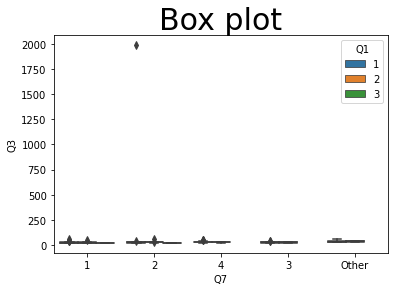

In [27]:
#BOX PLOT

seabornInstance.boxplot(x='Q7', y='Q3', data=dataset, hue='Q1')
plt.title('Box plot', fontsize=30)

In [28]:
dataset_1['Q3'] = dataset_1['Q3'].replace(1987, 33)

In [29]:
dataset_1['Q3'].value_counts()

26    32
24    29
25    27
22    24
29    20
23    15
27    12
28    11
31     7
30     7
36     4
33     4
32     3
21     3
39     3
35     3
34     3
48     2
43     2
58     1
53     1
63     1
50     1
38     1
40     1
56     1
Name: Q3, dtype: int64

Group ages into ranges

In [30]:
bins = [0, 25, 30, 35, 40, 45, 50, 55, 60, 65]

In [31]:
names = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
dataset_1['Q3'] = pd.cut(dataset_1['Q3'], bins, labels = names)

In [33]:
dataset_1['Q3'].replace(('1', '2', '3', '4', '5', '6', '7', '8', '9'),(1, 2, 3, 4, 5, 6, 7, 8, 9), inplace = True)

In [34]:
dataset_1['Q3'].value_counts()

1    98
2    82
3    20
4     9
6     3
5     2
8     2
7     1
9     1
Name: Q3, dtype: int64

In [35]:
dataset_1['Q5'].replace(('EU', 'International', 'UK'),(1, 2, 1), inplace = True)

In [36]:
dataset_1['Q5'].value_counts()

1    185
2     33
Name: Q5, dtype: int64

In [37]:
dataset_1['Q6'].replace(("Other", "PhD", "Research master's degree","Taught master's degree"),(0, 1, 2, 3), inplace = True)

In [38]:
dataset_1['Q6'].value_counts()

1    160
3     41
2     12
0      5
Name: Q6, dtype: int64

In [39]:
dataset_1['Q7'].replace(('1','2', '3','4','Other'),(1, 2, 3, 4, 1), inplace = True)

In [40]:
dataset_1['Q7'].value_counts()

1    108
2     44
3     38
4     28
Name: Q7, dtype: int64

In [41]:
dataset_1['Q8'].unique()

array(['Arts and humanities', 'Computer science', 'Life sciences',
       'Physical science', 'Social sciences',
       'Engineering and technology', 'Clinical, pre-clinical and health',
       'Education', 'Other', 'Law', 'Psychology'], dtype=object)

In [42]:
dataset_1['Q8'].replace(('Arts and humanities', 'Computer science', 'Life sciences',
       'Physical science', 'Social sciences',
       'Engineering and technology', 'Clinical, pre-clinical and health',
       'Education', 'Other', 'Law', 'Psychology'),(1, 3, 6, 8, 7, 3, 2, 4, 10, 5, 9), inplace = True)

In [43]:
dataset_1['Q8'].value_counts()

6     80
1     42
9     17
7     15
10    15
3     13
2     13
8     11
5      7
4      5
Name: Q8, dtype: int64

In [44]:
dataset_1['Q9'].unique()

array(['To a large extent', 'Somewhat', 'Completely', 'To a small extent'],
      dtype=object)

In [45]:
dataset_1['Q9'].replace(('To a large extent', 'Somewhat', 'Completely', 'To a small extent', 'not at all'),
                        (4, 3, 5, 2, 1), inplace = True)

In [46]:
dataset_1['Q9'].value_counts()

4    120
3     55
5     36
2      7
Name: Q9, dtype: int64

In [47]:
dataset_1

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
0,1,1,2,2,1,1,1,4,Sometimes,Almost never,...,Never,Never,Never,Sometimes,Never,Never,Very often,Almost never,Never,Being away from home as an international student
1,1,1,2,1,1,2,3,3,Fairly often,Sometimes,...,Never,Sometimes,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Never,lack of holiday
2,1,1,7,1,1,4,1,4,Fairly often,Almost never,...,Almost never,Sometimes,Almost never,Very often,Never,Very often,Almost never,Sometimes,Fairly often,The death of a friend. Loss of extracurricular...
3,1,2,2,1,1,4,1,3,Sometimes,Sometimes,...,Almost never,Never,Almost never,Sometimes,Sometimes,Almost never,Sometimes,Sometimes,Almost never,NaN
4,1,1,1,1,2,1,6,3,Sometimes,Almost never,...,Almost never,Almost never,Sometimes,Sometimes,Never,Never,Sometimes,Fairly often,Sometimes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2,2,1,1,2,1,6,5,Fairly often,Almost never,...,Almost never,Sometimes,Almost never,Fairly often,Very often,Very often,Fairly often,Fairly often,Fairly often,Father has a terminal illness that is deterior...
214,2,1,1,1,1,3,7,2,Sometimes,Almost never,...,Sometimes,Almost never,Almost never,Almost never,Almost never,Sometimes,Almost never,Sometimes,Never,Brexit and American (USA) politics
215,2,1,2,2,1,1,6,3,Sometimes,Sometimes,...,Never,Never,Almost never,Very often,Sometimes,Fairly often,Fairly often,Very often,Never,NaN
216,3,1,1,1,3,2,5,4,Very often,Almost never,...,Almost never,Almost never,Sometimes,Sometimes,Never,Fairly often,Fairly often,Very often,Fairly often,Family issues and a few health ups and downs.


In [48]:
dataset_1['Q10_1'].unique()

array(['Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'],
      dtype=object)

In [49]:
dataset_1['Q10_1'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [50]:
dataset_1['Q10_2'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [51]:
dataset_1['Q10_3'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [52]:
dataset_1['Q10_4'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                          inplace = True)

In [53]:
dataset_1['Q10_5'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [54]:
dataset_1['Q10_6'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [55]:
dataset_1['Q10_7'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [56]:
dataset_1['Q10_8'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [57]:
dataset_1['Q10_9'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [58]:
dataset_1['Q10_10'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [59]:
dataset_1['Q10_11'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [60]:
dataset_1['Q10_12'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [61]:
dataset_1['Q10_12'].value_counts()

3    72
2    53
4    38
1    36
5    19
Name: Q10_12, dtype: int64

In [62]:
dataset_1.sample(10)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
67,1,1,1,1,3,1,10,3,3,2,...,Never,Never,Almost never,Sometimes,Never,Never,Fairly often,Sometimes,Never,The balance between different work for the Uni...
108,1,1,4,1,3,1,5,5,5,4,...,Sometimes,Fairly often,Fairly often,Very often,Sometimes,Very often,Fairly often,Very often,Very often,work
88,1,1,2,1,1,3,10,4,4,3,...,Never,Fairly often,Never,Almost never,Almost never,Almost never,Sometimes,Almost never,Never,NaN
145,1,1,2,1,1,4,9,3,4,3,...,Fairly often,Almost never,Sometimes,Sometimes,Sometimes,Very often,Sometimes,Sometimes,Never,NaN
104,1,1,2,1,1,1,1,4,4,2,...,Almost never,Almost never,Sometimes,Sometimes,Almost never,Fairly often,Very often,Sometimes,Never,Caffeine (drinking more caffeine to get more w...
34,1,2,1,2,1,1,8,4,5,3,...,Sometimes,Almost never,Sometimes,Very often,Never,Sometimes,Fairly often,Almost never,Almost never,Recently diagnosed illness
129,1,1,1,1,1,2,3,4,5,2,...,Never,Never,Never,Fairly often,Almost never,Sometimes,Fairly often,Almost never,Never,High stress of my other half from their univer...
75,1,1,3,1,1,3,9,5,4,2,...,Never,Almost never,Never,Fairly often,Very often,Never,Sometimes,Never,Sometimes,Relationship break up and house move
66,1,1,2,1,1,2,6,4,4,3,...,Sometimes,Fairly often,Almost never,Sometimes,Almost never,Sometimes,Fairly often,Fairly often,Never,Organising a wedding
89,1,1,3,1,1,4,1,4,4,4,...,Almost never,Sometimes,Sometimes,Fairly often,Sometimes,Almost never,Fairly often,Fairly often,Fairly often,NaN


In [63]:
dataset_1['Q12'].unique()

array(['Yes', 'Not sure', 'No'], dtype=object)

In [64]:
dataset_1['Q12'].replace(('Yes', 'Not sure', 'No'),(1, 3, 2), inplace = True)

In [65]:
dataset_1['Q12'].value_counts()

1    91
3    91
2    36
Name: Q12, dtype: int64

In [66]:
dataset_1['Q13'].unique()

array(['Yes', 'Not sure', 'No'], dtype=object)

In [67]:
dataset_1['Q13'].replace(('Yes', 'Not sure', 'No'),(1, 3, 2), inplace = True)

In [68]:
dataset_1['Q17_1'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_2'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_3'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_4'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_5'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_6'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_7'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_8'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_9'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_10'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_11'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_12'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)

In [69]:
#Drop column Q18
dataset_1.drop(columns =['Q18'], inplace = True)

In [70]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
18,1,2,1,1,1,1,6,4,4,4,...,4,2,1,2,5,2,3,3,3,1
176,2,1,1,1,2,1,1,4,3,2,...,1,5,1,3,2,2,1,4,4,1
173,2,1,1,1,1,2,6,3,4,2,...,2,4,2,1,3,1,2,5,2,1
118,1,2,3,2,1,3,4,4,4,4,...,2,3,2,3,3,2,2,3,3,2
115,1,1,1,1,1,1,6,4,5,4,...,4,4,4,4,4,3,2,4,4,1


In [71]:
print(dataset_1.describe())

               Q1          Q2          Q5          Q6          Q7          Q8  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     1.270642    1.422018    1.151376    1.408257    1.935780    5.220183   
std      0.465551    0.948378    0.359240    0.816492    1.088484    2.816534   
min      1.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    2.250000   
50%      1.000000    1.000000    1.000000    1.000000    2.000000    6.000000   
75%      2.000000    1.000000    1.000000    1.000000    3.000000    7.000000   
max      3.000000    5.000000    2.000000    3.000000    4.000000   10.000000   

               Q9       Q10_1       Q10_2       Q10_3  ...       Q17_3  \
count  218.000000  218.000000  218.000000  218.000000  ...  218.000000   
mean     3.848624    3.844037    2.995413    3.036697  ...    2.784404   
std      0.724822    0.781990    1.013720    1.0

In [72]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Q1      218 non-null    int64   
 1   Q2      218 non-null    int64   
 2   Q3      218 non-null    category
 3   Q5      218 non-null    int64   
 4   Q6      218 non-null    int64   
 5   Q7      218 non-null    int64   
 6   Q8      218 non-null    int64   
 7   Q9      218 non-null    int64   
 8   Q10_1   218 non-null    int64   
 9   Q10_2   218 non-null    int64   
 10  Q10_3   218 non-null    int64   
 11  Q10_4   218 non-null    int64   
 12  Q10_5   218 non-null    int64   
 13  Q10_6   218 non-null    int64   
 14  Q10_7   218 non-null    int64   
 15  Q10_8   218 non-null    int64   
 16  Q10_9   218 non-null    int64   
 17  Q10_10  218 non-null    int64   
 18  Q10_11  218 non-null    int64   
 19  Q10_12  218 non-null    int64   
 20  Q11     218 non-null    object  
 21  Q12     218 non-

In [75]:
#'NaN occurrences in Columns

print(dataset_1.isnull().sum(axis = 0))

Q1        0
Q2        0
Q3        0
Q5        0
Q6        0
Q7        0
Q8        0
Q9        0
Q10_1     0
Q10_2     0
Q10_3     0
Q10_4     0
Q10_5     0
Q10_6     0
Q10_7     0
Q10_8     0
Q10_9     0
Q10_10    0
Q10_11    0
Q10_12    0
Q11       0
Q12       0
Q13       0
Q17_1     0
Q17_2     0
Q17_3     0
Q17_4     0
Q17_5     0
Q17_6     0
Q17_7     0
Q17_8     0
Q17_9     0
Q17_10    0
Q17_11    0
Q17_12    0
dtype: int64
